In [1]:
from matplotlib import pyplot as plt
import random
from copy import deepcopy
import networkx as nx
import callable
import time
import os
import numpy as np
from tabulate import tabulate
from time import perf_counter
import cplex
from docplex.mp.model import Model


In [2]:
def maxNumOfColours(graph):
    maxDegree = 0
    for i in graph:
        degree = len(list(graph.neighbors(i)))
        if degree > maxDegree:
            maxDegree = degree
            
    return maxDegree

In [3]:
def normEdge(u, v):
    return (u, v) if u < v else (v, u)

In [4]:
def draw(graph, colouring):
    nx.draw(graph, edge_color=colouring,with_labels=True)
    plt.show()

In [5]:
def readGraph(filepath):

    graph = nx.Graph()
    numNodes: int
    edges = []

    with open(filepath) as f:
        lines = f.readlines()
        numNodes = int(lines[0].split()[2])
        edges = [tuple(map(int,line.split()[1:])) for line in lines[1:]]

    graph.add_nodes_from(range(1, numNodes + 1))
    graph.add_edges_from(edges)
    return graph


In [6]:
def cplexSolve(graph):
    model = Model("minimumEdge")

    maxDegree = maxNumOfColours(graph)
    edges = [normEdge(u, v) for (u,v) in graph.edges()]
    numEdges = len(edges)
    colours = range(1,maxDegree+1)
    nodes = list(graph.nodes())

    x = model.binary_var_matrix(range(numEdges), colours, name='x')
    y = model.integer_var_matrix(nodes, colours, lb=0,name='z')

    for e in range(numEdges):
        model.add_constraint(model.sum(x[e, c] for c in colours) == 1)

    for n in nodes:
        incidentEdges = [i for i, e in enumerate(edges) if n in e]
        for c in colours:
            model.add_constraint(model.sum(x[i,c] for i in incidentEdges) -1 <= y[n, c])

    model.minimize(model.sum(y[n, c] for n in nodes for c in colours)) 

    solution = model.solve()
    fitness = solution.objective_value
    solColours = []

    for i,_ in enumerate(edges):
        for c in colours:
            if solution.get_value(x[i,c]):
                solColours.append(c)
                break
    
    return fitness, solColours
        

In [7]:
def testGraphs(dir):
    
    files = os.listdir(dir)

    for file in files:
        filepath = os.path.join(dir,file)
        print(f"{file} testing...")
        graph = readGraph(filepath)
        
        fitness, solColours = cplexSolve(graph)
        print(f'Number of conflicts: {fitness}')
        # print(solColours)
        draw(graph, solColours)



graph5.txt testing...
Number of conflicts: 0.0


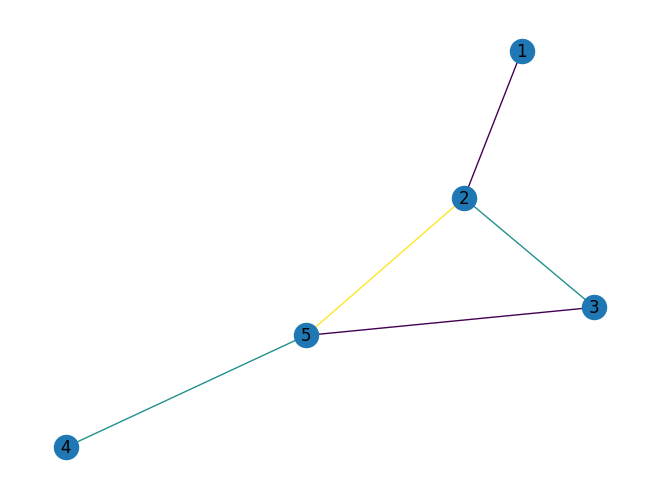

graph13.txt testing...
Number of conflicts: 0.0


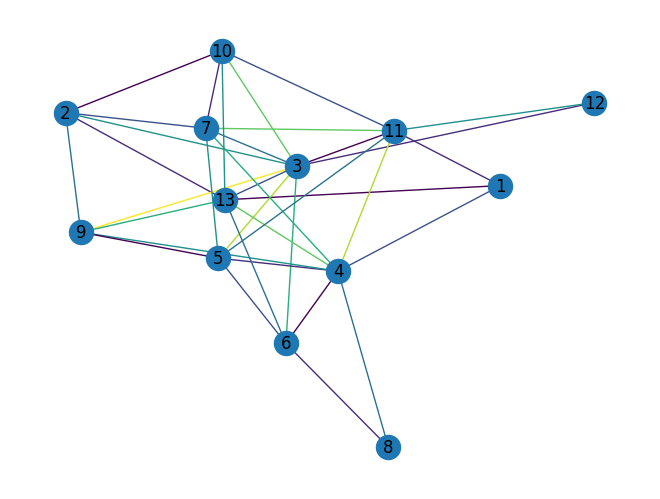

graph6.txt testing...
Number of conflicts: 0.0


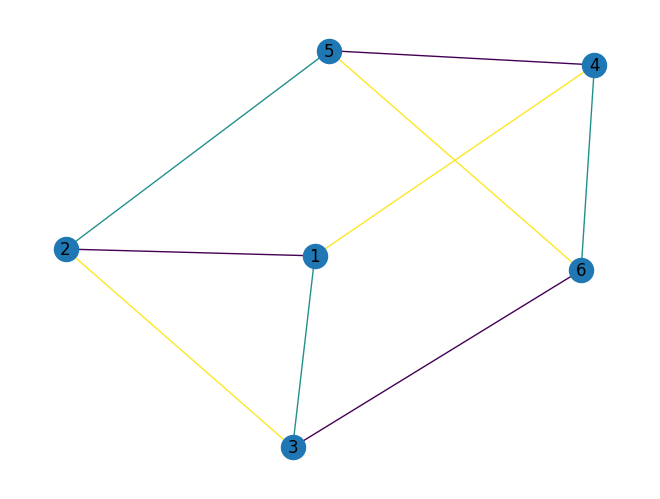

graph11.txt testing...
Number of conflicts: 0.0


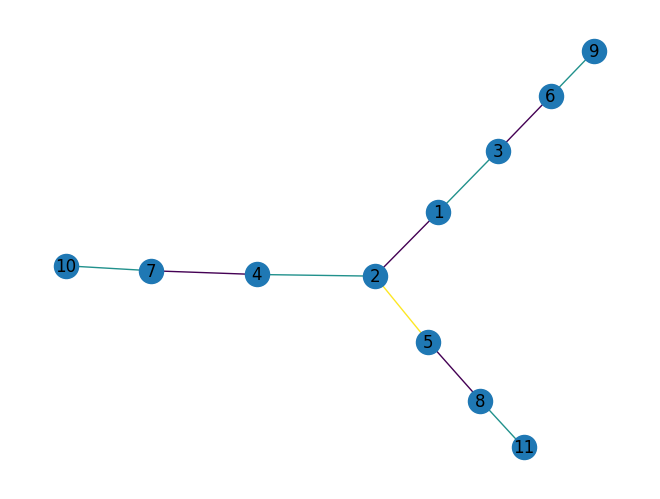

graph9.txt testing...
Number of conflicts: 0.0


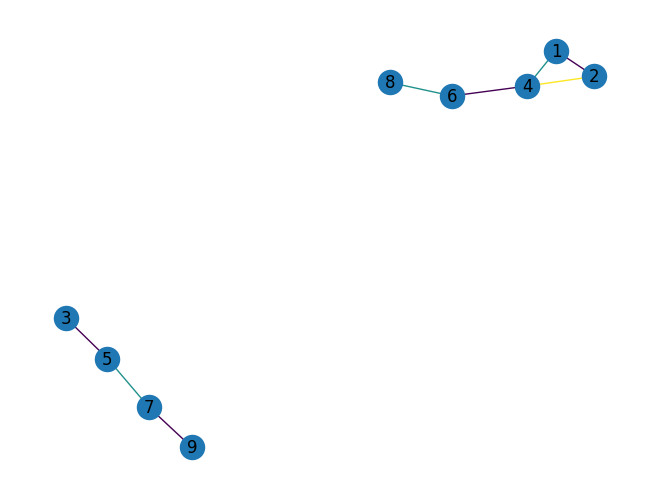

graph15.txt testing...
Number of conflicts: 0.0


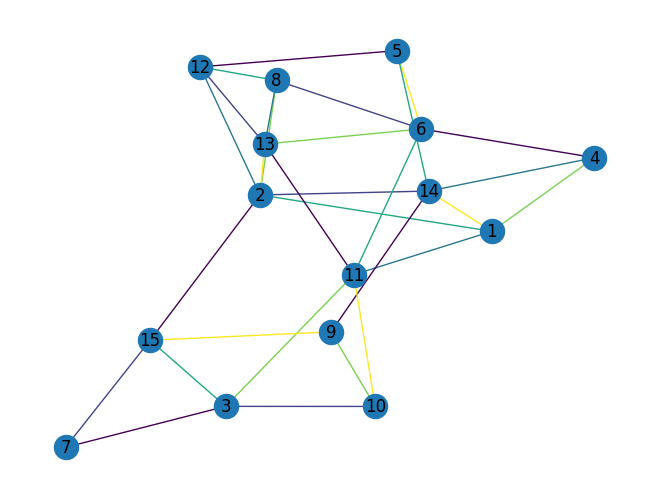

In [8]:
testGraphs("tests/smallTests")

big30.txt testing...
Number of conflicts: 0.0


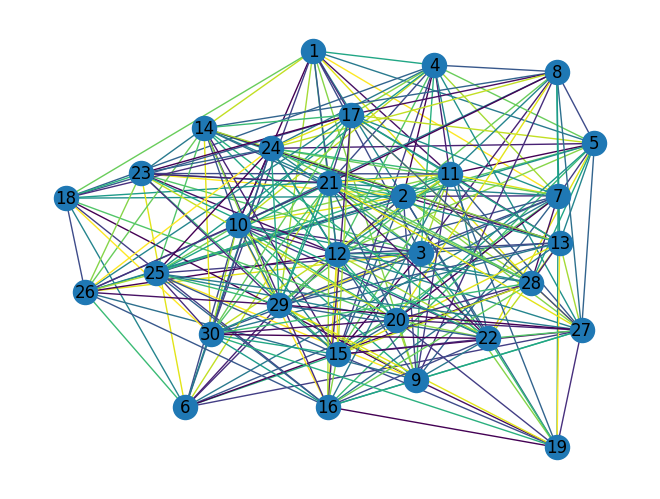

big47.6.txt testing...
Number of conflicts: 0.0


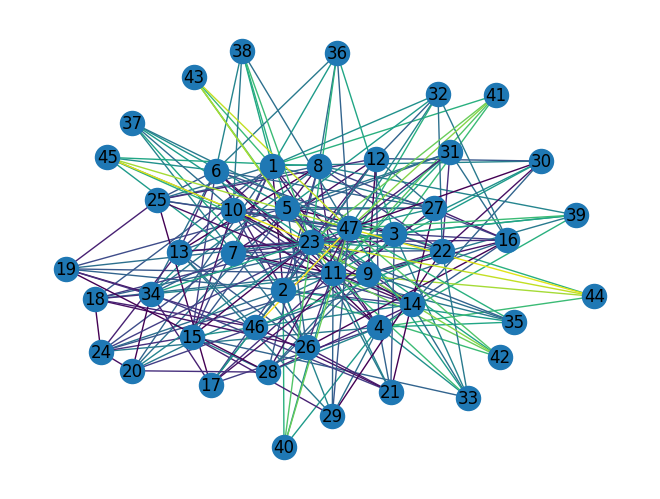

big22.txt testing...
Number of conflicts: 0.0


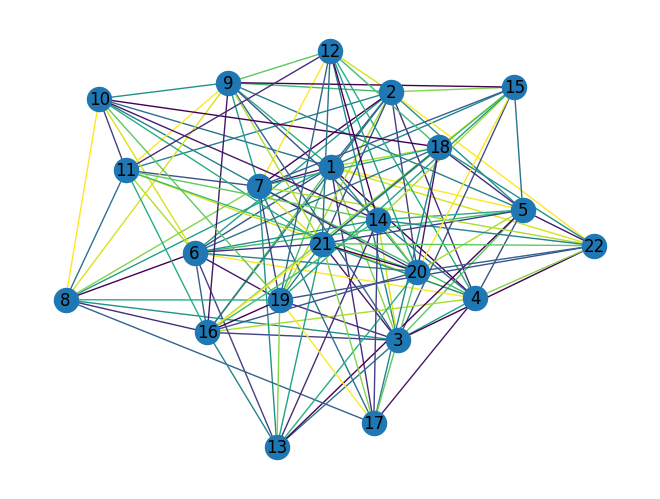

big95.txt testing...
Number of conflicts: 0.0


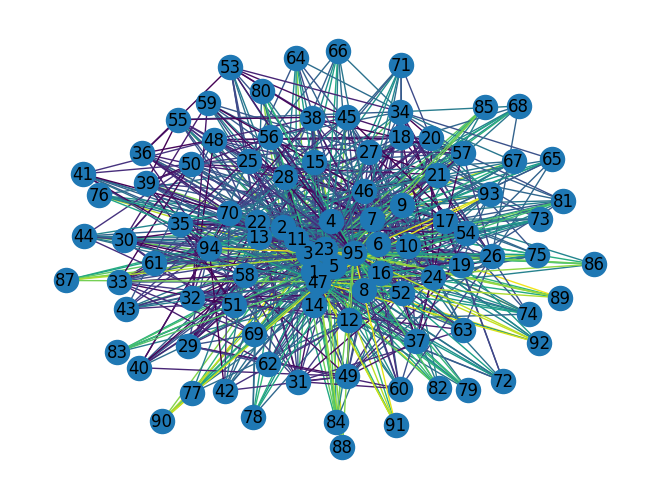

In [9]:
testGraphs("tests/bigTests")

In [10]:
def testBiggerGraph(file):
    print(f"{file} testing...")
    graph = readGraph(file)
    
    fitness, solColours = cplexSolve(graph)
    print(f'Number of conflicts: {fitness}')
    # print(solColours)
    draw(graph, solColours)

tests/experimentalTests/gcol.txt testing...


Number of conflicts: 0.0


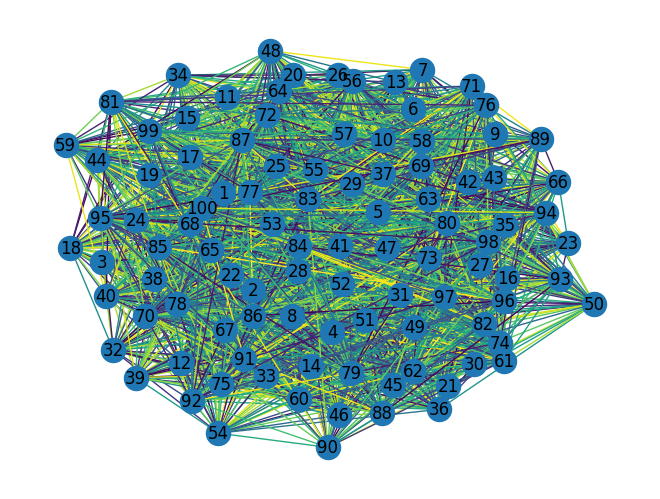

In [11]:
testBiggerGraph("tests/experimentalTests/gcol.txt")

tests/flowerSnark.txt testing...
Number of conflicts: 2.0


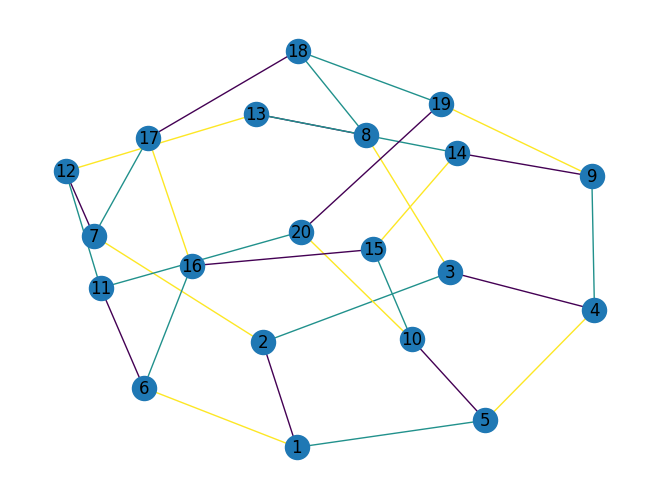

In [ ]:
testBiggerGraph("tests/experimentalTests/flowerSnark.txt")

tests/experimentalTests/petersen.txt testing...


Number of conflicts: 2.0


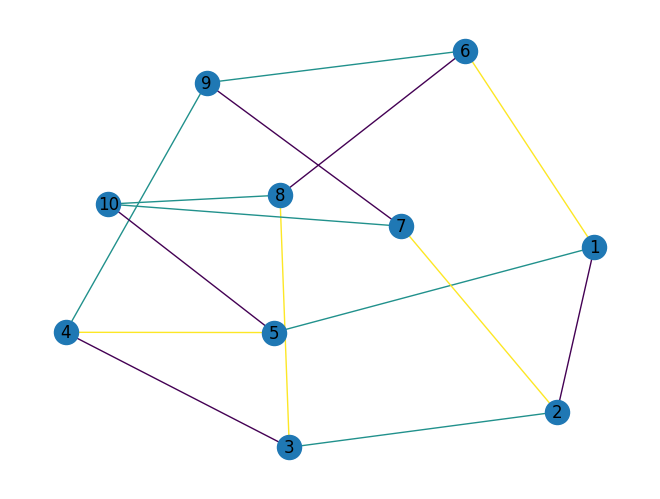

In [13]:
testBiggerGraph("tests/experimentalTests/petersen.txt")


In [29]:
def testRandom(graph):
    fitness, solColours = cplexSolve(graph)
    print(f'Number of conflicts: {fitness}')
    draw(graph, solColours)

Number of conflicts: 0.0


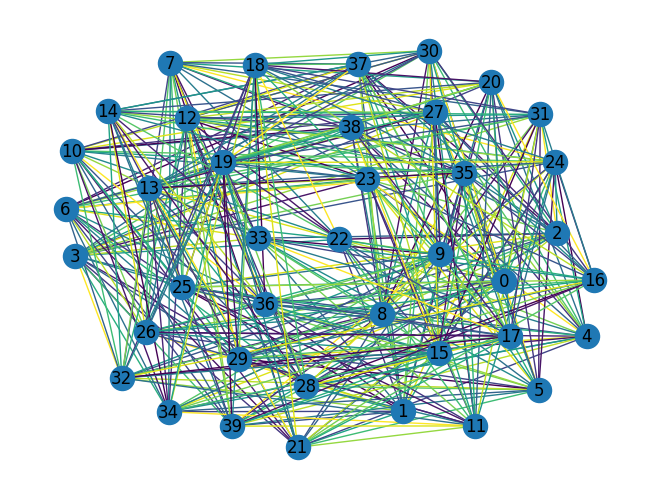

In [30]:
graph = nx.complete_bipartite_graph(20,20)
testRandom(graph)

Number of conflicts: 5.0


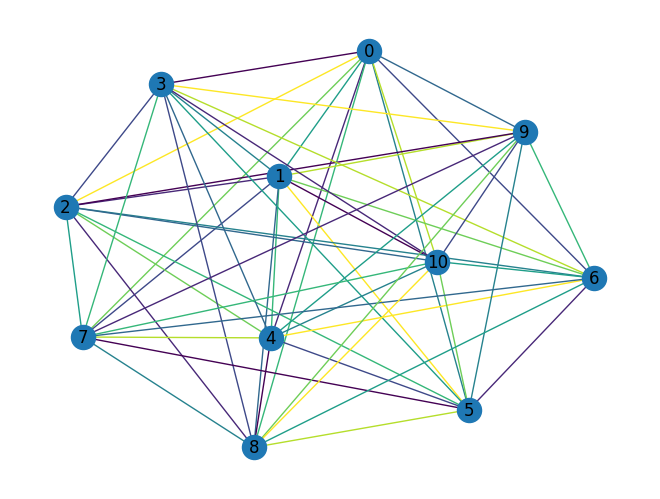

In [32]:
graph = nx.complete_graph(11)
testRandom(graph)

Number of conflicts: 123.0


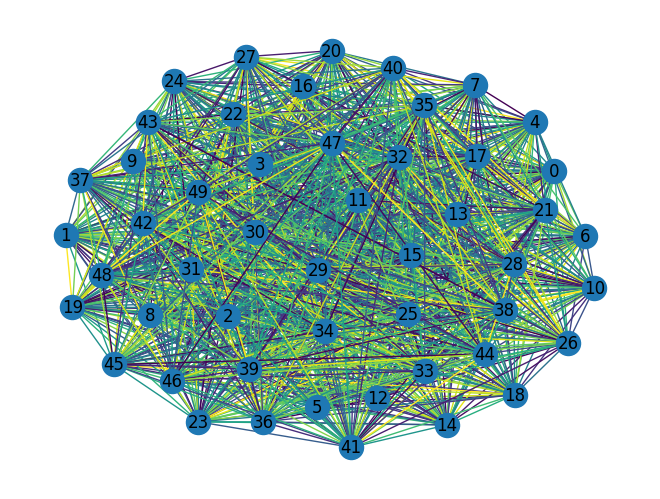

In [ ]:
#prevelik
graph = nx.complete_graph(50)
testRandom(graph)